## Background

You have been given a dataset on cow production that includes information such as cow and farm ID (Farm Alpha and Farm Beta), cow breeds (Guernsey, Holstein, and Jersey), date (from 0 to 41), weight (pounds), temperature (celsius), humidity, production yield, and a binary label indicating whether a cow is productive. The dataset contains records collected from two different farms.

## Objectives

Your objectives are to determine if there is a significant impact on production based on the farm. To do this, we want to remove the breed effect from the production.


## Data Overview

In [84]:
import pandas as pd
import seaborn as sns
import os

data_a = pd.read_csv(os.path.join("data_farm", "farm_alpha.csv"))
data_b = pd.read_csv(os.path.join("data_farm", "farm_beta.csv"))

'Farm Alpha'

,ID,breed,farm_id,day,weight,temperature,humidity,production,health
0,1,Holstein,farm_alpha,0,1299.971,22.9,51.3,42.120,unproductive
1,1,Holstein,farm_alpha,0,1314.688,22.9,51.3,43.506,unproductive
2,1,Holstein,farm_alpha,1,1343.101,20.3,39.3,44.457,unproductive
3,1,Holstein,farm_alpha,1,1374.494,20.3,39.3,42.925,unproductive
4,1,Holstein,farm_alpha,2,1394.464,22.4,33.8,41.360,unproductive


<Axes: xlabel='day', ylabel='production'>

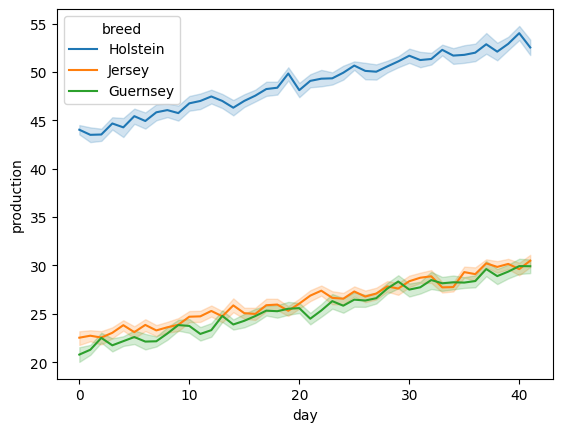

In [85]:
display("Farm Alpha", data_a.head())
sns.lineplot(data=data_a, x="day", y="production", hue="breed")

<Axes: xlabel='breed', ylabel='production'>

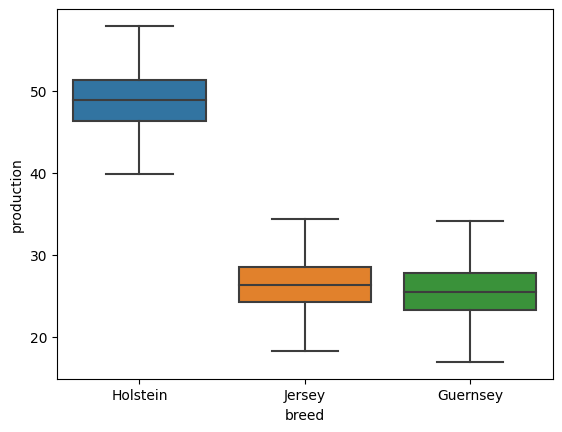

In [90]:
sns.boxplot(data=data_a, x="breed", y="production")

'Farm Beta'

,cow_id,BD,name,d,weight,temp,humidity,pA,pB,health
0,1,Holstein,farm_beta,0,1190.661,22.6,31.3,42.907,41.012,bad
1,1,Holstein,farm_beta,1,1183.337,19.7,53.0,45.182,44.585,bad
2,1,Holstein,farm_beta,2,1169.211,20.1,41.9,44.069,40.346,bad
3,1,Holstein,farm_beta,3,1174.343,23.1,37.5,41.022,43.855,bad
4,1,Holstein,farm_beta,4,1148.148,16.0,63.5,45.036,45.003,bad


<Axes: xlabel='d', ylabel='pA'>

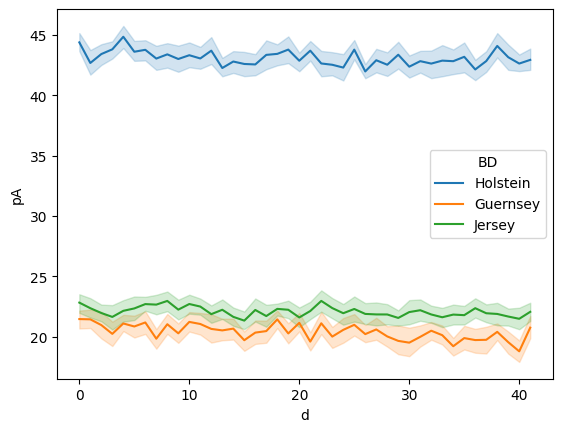

In [88]:
display("Farm Beta", data_b.head())
sns.lineplot(data=data_b, x="d", y="pA", hue="BD")

<Axes: xlabel='BD', ylabel='pA'>

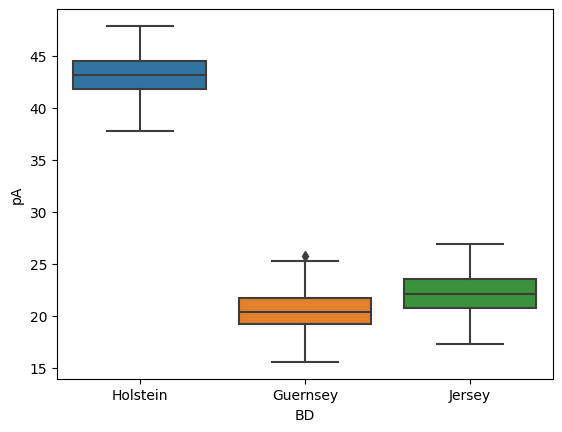

In [91]:
sns.boxplot(data=data_b, x="BD", y="pA")

## Data Assumptions

We assume that the production is a linear function of the weight, temperature, humidity, and breed (represented by $\beta_0$ and $\beta_1$):

$$

production = \beta_0 + \beta_1 \times weight + \beta_2 \times temperature + \beta_3 \times humidity

$$

## Object design

<img src="oop_design.png" width="900px">

## Data Preprocessing

### Farm Alpha

In [59]:
display(data_a)
data_a_new = data_a.groupby(["ID", "breed", "farm_id", "day", "temperature", "humidity"]).aggregate(
    weight=("weight", "mean"),
    production=("production", "mean"),
    health=("health", "max"), # ASCII: U > P
).reset_index()
# replace health column values-> productive->1, unproductive->0
data_a_new["health"] = data_a_new["health"].replace({"productive": 1, "unproductive": 0})
display(data_a_new)

,ID,breed,farm_id,day,weight,temperature,humidity,production,health
0,1,Holstein,farm_alpha,0,1199.496,24.4,31.6,41.068,unproductive
1,1,Holstein,farm_alpha,0,1202.502,24.4,31.6,42.422,unproductive
2,1,Holstein,farm_alpha,1,1216.122,16.0,39.6,41.617,unproductive
3,1,Holstein,farm_alpha,1,1211.473,16.0,39.6,40.961,unproductive
4,1,Holstein,farm_alpha,2,1230.531,16.3,52.1,42.226,unproductive
...,...,...,...,...,...,...,...,...,...
4195,50,Jersey,farm_alpha,39,1593.019,20.2,44.6,21.609,unproductive
4196,50,Jersey,farm_alpha,40,1611.128,23.9,69.8,26.990,productive
4197,50,Jersey,farm_alpha,40,1612.824,23.9,69.8,24.317,productive
4198,50,Jersey,farm_alpha,41,1618.563,20.2,46.1,21.118,unproductive


,ID,breed,farm_id,day,temperature,humidity,weight,production,health
0,1,Holstein,farm_alpha,0,24.4,31.6,1200.9990,83.490,0
1,1,Holstein,farm_alpha,1,16.0,39.6,1213.7975,82.578,0
2,1,Holstein,farm_alpha,2,16.3,52.1,1238.7280,83.048,0
3,1,Holstein,farm_alpha,3,21.7,66.0,1250.6770,93.380,0
4,1,Holstein,farm_alpha,4,21.0,61.0,1259.9515,89.939,0
...,...,...,...,...,...,...,...,...,...
2095,50,Jersey,farm_alpha,37,23.6,40.5,1566.8365,47.432,0
2096,50,Jersey,farm_alpha,38,15.3,37.6,1579.2995,41.091,0
2097,50,Jersey,farm_alpha,39,20.2,44.6,1590.2830,45.861,0
2098,50,Jersey,farm_alpha,40,23.9,69.8,1611.9760,51.307,1


### Farm Beta

In [60]:
display(data_b)
# rename the column names
data_b.columns = ["ID", "breed", "farm_id", "day", "weight", "temperature", "humidity", "production_A", "production_B", "health"]
# tidy the data, turn pA and pB to one single column
data_b_new = data_b.melt(id_vars=["ID", "breed", "farm_id", "day", "weight", "temperature", "humidity", "health"], value_vars=["production_A", "production_B"], var_name="production_type", value_name="production")
data_b_new = data_b_new.groupby(["ID", "breed", "farm_id", "day", "temperature", "humidity"]).aggregate(
    weight=("weight", "mean"),
    production=("production", "mean"),
    health=("health", "max"), # choose unproductive over productive
).reset_index()
# replace health column values-> good->1, bad->0
data_b_new["health"] = data_b_new["health"].replace({"good": 1, "bad": 0})
display(data_b_new)

,cow_id,BD,name,d,weight,temp,humidity,pA,pB,health
0,1,Guernsey,farm_beta,0,1092.456,17.0,37.8,18.415,16.614,good
1,1,Guernsey,farm_beta,1,1074.254,15.2,51.3,21.217,21.523,good
2,1,Guernsey,farm_beta,2,1077.255,20.0,80.0,23.348,21.471,good
3,1,Guernsey,farm_beta,3,1048.687,20.7,64.0,23.817,21.613,good
4,1,Guernsey,farm_beta,4,1041.654,18.8,49.1,19.013,18.823,good
...,...,...,...,...,...,...,...,...,...,...
2095,50,Guernsey,farm_beta,37,792.064,17.6,54.6,20.887,21.150,good
2096,50,Guernsey,farm_beta,38,784.802,24.0,42.7,20.294,21.714,good
2097,50,Guernsey,farm_beta,39,781.447,19.5,36.7,18.722,19.337,good
2098,50,Guernsey,farm_beta,40,771.633,24.3,42.9,19.200,21.549,good


,ID,breed,farm_id,day,temperature,humidity,weight,production,health
0,1,Guernsey,farm_beta,0,17.0,37.8,1092.456,35.029,1
1,1,Guernsey,farm_beta,1,15.2,51.3,1074.254,42.740,1
2,1,Guernsey,farm_beta,2,20.0,80.0,1077.255,44.819,1
3,1,Guernsey,farm_beta,3,20.7,64.0,1048.687,45.430,1
4,1,Guernsey,farm_beta,4,18.8,49.1,1041.654,37.836,1
...,...,...,...,...,...,...,...,...,...
2095,50,Guernsey,farm_beta,37,17.6,54.6,792.064,42.037,1
2096,50,Guernsey,farm_beta,38,24.0,42.7,784.802,42.008,1
2097,50,Guernsey,farm_beta,39,19.5,36.7,781.447,38.059,1
2098,50,Guernsey,farm_beta,40,24.3,42.9,771.633,40.749,1


## Result

In [3]:
from oop_demo import Analyzer
analyzer = Analyzer()
analyzer.load_data("data_farm")
analyzer.merge_farms()

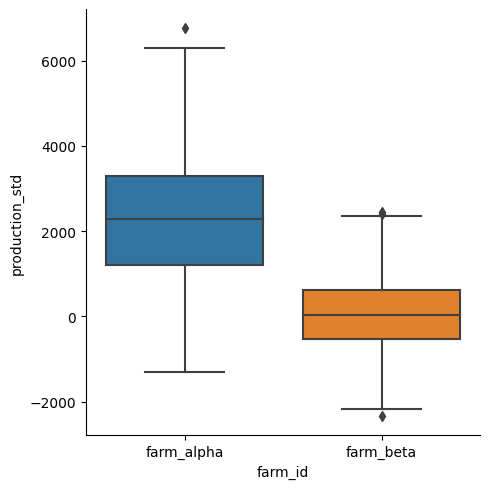

In [2]:
analyzer.figure_1()

/Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_05_Teaching/APSC-5984-ADS/labs/lab_14/oop_demo.py:72: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


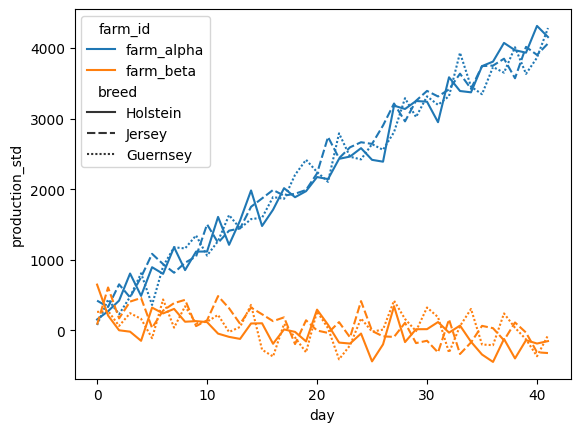

In [4]:
analyzer.figure_2()

In [9]:
analyzer.build_anova()

                           sum_sq      df            F    PR(>F)
C(breed)             4.233977e+06     2.0     1.582803  0.205521
C(farm_id)           5.090028e+09     1.0  3805.647080  0.000000
C(breed):C(farm_id)  7.910529e+05     2.0     0.295722  0.744010
Residual             5.609447e+09  4194.0          NaN       NaN


,sum_sq,df,F,PR(>F)
C(breed),4.233977e+06,2.0,1.582803,0.205521
C(farm_id),5.090028e+09,1.0,3805.647080,0.000000
C(breed):C(farm_id),7.910529e+05,2.0,0.295722,0.744010
Residual,5.609447e+09,4194.0,NaN,NaN


LinearRegression()

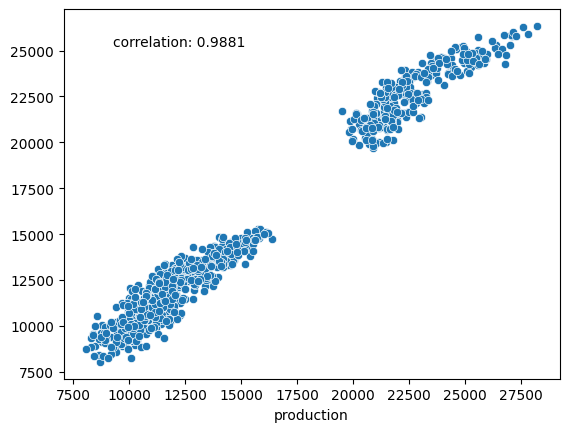

In [7]:
analyzer.pred_ols()

RandomForestRegressor()

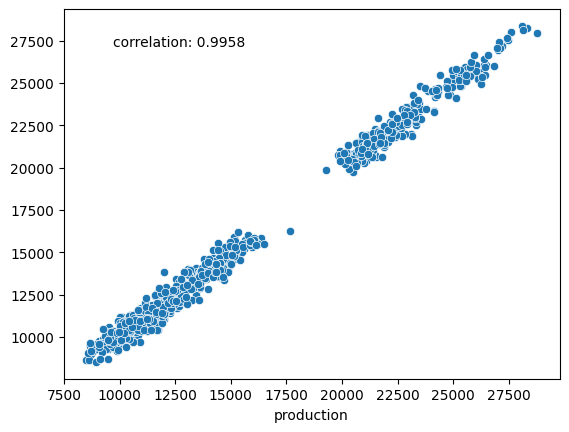

In [8]:
analyzer.pred_rf()